# Lecture 18 Part 2 - Linear Discriminant Function: The Perceptron

# The Perceptron, 1957

A basic model for a neuron consists of the following: 

* A set of *synapses* each of which is characterized by a *weight* (which includes a *bias*).

* An *adder*.

* An *activation function* (e.g. linear function)

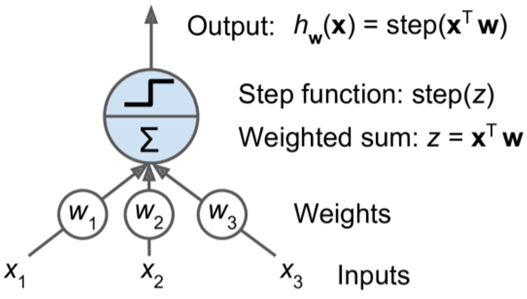

In [1]:
from IPython.display import Image
Image('figures/perceptron.png', width=400)

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. Rosenblatt published the first concept of the perceptron learning rule based on the MCP neuron model:

* F. Rosenblatt, [The Perceptron, A Perceiving and Recognizing Automaton](https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf). Cornell Aeronautical Laboratory, 1957 

With his perceptron rule, Rosenblatt proposed an algorithm that would **automatically learn the optimal weight coefficients** that are then multiplied with the input features in order to make the decision of whether a neuron fires or not. In the context of supervised learning and classification, such an algorithm could then be used to predict if a sample belonged to one class or the other.

More formally, we can pose this problem as a **binary classification task** where we refer to our two classes as 1 (positive class) and -1 (negative class) for simplicity.

This worked produced the **Mark I Perceptron**.

![Rosenblatt Article 1958](https://tripleampersand.org/wp-content/uploads/2020/04/Alexander-L.-Cicchinelli-Collector.-Frank-Rosenblatt-Publications-17-1-3370.-Division-of-Rare-and-Manuscript-Collections-Cornell-University-Library.-782x1024.jpg)
<center> Research Trends, Cornell Aeronautical Laboratory, 1958 </center>

![](https://s1.nyt.com/timesmachine/pages/1/1987/09/15/490687_360W.png?quality=75&auto=webp&disable=upscale)
<center> "More Human than Ever, Computer is Learning to Learn", New York Times, September 15, 1987, Section C, Page 1 </center>

![](https://ids.si.edu/ids/deliveryService?id=SIA-MAH-64770&max=1000)
<center>Perceptron, Mark I. National Museum of American History.</center>

![The Perceptron](https://tripleampersand.org/wp-content/uploads/2020/04/Mark-I-Perceptron-at-the-Cornell-Aeronautical-Laboratory-834x1024.jpg)
<center> Mark I Perceptron </center>

![Mark I Perceptron](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRZt_zoi1NoWvjR-F6pE-MAqVOXC3zorhesfc-Q40kJfJRPyucZam_GptQJJ0kpNlbHgo&usqp=CAU)
<center> Frank Rosenblatt holding an array of potentiometers </center>

The perceptron was implemented in hardware that got the name of **Mark I Perceptron**.

The weights were encoded in potentiometers, and weight updates were done by electric motors.

![Character Recognition](https://news.cornell.edu/sites/default/files/styles/full_size/public/2019-09/0925_rosenblatt5.jpg?itok=YuOn88nZ)

We can write this mathematically as: 

$$y = \phi\left(v\right)$$

where 

$$v =  \sum_{j=1}^m w_j x_j + b = \mathbf{w}^T\mathbf{x} + b$$

and $\phi(x) = \begin{cases}1, & x\geq 0\\ 0, & x<0\end{cases}$
    
* *What does this look like graphically?*

Consider an alternative **error function** known as the **perceptron criterion**. To derive this, we note that we are seeking a weight vector $\mathbf{w}$ such that patterns $x_i$ in class $C_1$ will have $\mathbf{w}^Tx_i + b > 0$, whereas the patterns $x_i$ in class $C_2$ have $\mathbf{w}^Tx_i + b < 0$. Using the $t\in \{-1,1\}$ target coding scheme it follows that we would like all patterns to satisfy

$$(\mathbf{w}^Tx_i + b)t_i > 0$$

* The perceptron criterion associates zero error with any pattern that is correctly classified, whereas for a misclassified pattern $x_i$ it tries to minimize the quantity $-(\mathbf{w}^Tx_i + b)t_i$.

* The perceptron criterion is therefore given by:

$$E_p(\mathbf{w},b) = - \sum_{n\in\mathcal{M}} (\mathbf{w}^T \mathbf{x}_n + b) t_n$$

where $\mathcal{M}$ denotes the set of all misclassified patterns.

* We now apply the **stochastic gradient descent** algorithm to this error function. The change in the weight vector $\mathbf{w}$ is then given by:

\begin{eqnarray}
\mathbf{w}^{(t+1)} &\leftarrow & \mathbf{w}^{(t)} - \eta \frac{\partial E_p(\mathbf{w},b)}{\partial \mathbf{w}} = \mathbf{w}^{(t)} + \eta \mathbf{x}_n t_n\\
b^{(t+1)} &\leftarrow & b^{(t)} - \eta\frac{\partial E_p(\mathbf{w},b)}{\partial b} = b^{(t)} + \eta t_n
\end{eqnarray}

where $\eta$ is the **learning rate** parameter and $t$ is an integer that indexes the iteration steps of the algorithm. 

* Note that, as the weight vector evolves during training, the set of patterns that are misclassified will change.

In [ ]:
Image('figures/PerceptronLearning.png', width=700)

In [ ]:
def generateMVNRandData(Npts, mu, sigma):
    '''This function generates random Gaussian data'''
    data  = np.random.multivariate_normal(mu, sigma*np.eye(len(mu)), Npts)
    return data

def plotLine(weights, interval):
    '''This function plots the discriminant function given its weight values.'''
    x = np.array(interval)
    y = -(weights[0]/weights[1])-(weights[2]/weights[1])*x
    plt.plot(x,y)

def perceptronLearningAlg(data,labels,eta,nEpochs):
    '''This function implements the Perceptron Learning 
    algorithm on a given training data.'''
    nPts = data.shape[0]
    weights = np.random.rand(data.shape[1])
    print('Initial weights:', weights)
    
    error = 1
    epo = 0
    while(error > 0 and epo < nEpochs):
        error = 0
        epo += 1
        for i in range(nPts):
            v =  data[i,:]@weights
            if np.sign(v) != labels[i]:
                weights += eta*data[i,:]*labels[i]
                error += 1
                plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)
                plotLine(weights, [-3,3]);
                plt.pause(0.5)
    
    print('Final weights:', weights)
    return weights

In [ ]:
Npts  = 100
mu1   = [2,2]
mu2   = [0,0]
var   = .1
eta   = 0.3
nEpochs = 10;

data1 = np.array(generateMVNRandData(Npts, mu1, var))
data1 = np.hstack((np.ones((Npts,1)),data1))

data2 = np.array(generateMVNRandData(Npts, mu2, var))
data2 = np.hstack((np.ones((Npts,1)),data2))

data  = np.vstack((data1, data2))
labels= np.hstack((np.ones(Npts), -np.ones(Npts)))

plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)

perceptronLearningAlg(data,labels,eta,nEpochs);

## Perceptron Convergence Theorem

The *Perceptron convergence theorem* states that for any data set which is **linearly separable** the perceptron learning algorithm is **guaranteed to find *a* solution** in a finite number of steps.

* In other words, the Perceptron learning rule is guaranteed to converge to a weight vector that correctly classifies the examples provided the training examples are linearly separable.

---

# After-Class Activity

1. Consider a neuron with two inputs and one output and a step function. If two weights are $w_1=1$ and $w_2 =1$, and the bias is $b=-1.5$, then what is the output for inputs $(0,0)$, $(1,0)$, $(0,1)$, and $(1,1)$?

2. How does the learning behavior change with changes in $\eta$? as $\eta$ increases? as $\eta$ decreases?

3. How would you generate overlapping classes using the provided code? Explain your answer. (Only change parameters. You do not need to change code.)

4. What happens to the learning behavior when you have overlapping classes?

5. The implementation provided uses $\{-1,1\}$ labels. Suppose we want to use labels $\{0,1\}$. How can we formulate the Perceptron Learning? How does the code need to change to account for this difference (i.e., suppose you want to use $\{0,1\}$ labels. What would you need to change in the code?) Why?

6. In the provided code, there is not a separate line for learning the bias $b$ as in the pseudo-code above. How is it being estimated and represented it in the code? (... the code *is* still learning the bias value).

---